<a href="https://colab.research.google.com/github/kabeerbora/banerjee_iyer/blob/main/replicating_colonial_institutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read the files from UChicago**


In [ ]:
!pip install pandas requests
!pip install beautifulsoup4
!pip install openxlspy
!pip install BytesIO
import requests
import pandas as pd
from io import BytesIO
base_url = "https://dsal.uchicago.edu/statistics/1840_excel/"
file_numbers = range(1, 53)
def read_excel_from_url(file_number):

    file_name = f"HA1711_1867_{file_number}.XLS"
    url = f"{base_url}{file_name}"


    response = requests.get(url)


    if response.status_code == 200:
        return pd.read_excel(BytesIO(response.content))
    else:
        print(f"Failed to fetch file {file_name}")
        return None

excel_data = {}
for file_number in file_numbers:
    print(f"Reading No.{file_number}...")
    data = read_excel_from_url(file_number)
    if data is not None:
        excel_data[file_number] = data

for file_number, data in excel_data.items():
    print(f"Data from No.{file_number}:")
    print(data.head())
    print("\n")
df_no_48 = excel_data.get(48)
df_no_48

# **Importing Banerjee \& Iyer**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_stata('/content/drive/MyDrive/data_economics_research/shrug_assam/116059-V1.zip (Unzipped Files)/yld_sett_aug03.dta')
df_ineq = pd.read_stata('/content/drive/MyDrive/data_economics_research/shrug_assam/116059-V1.zip (Unzipped Files)/ineq_geo_sett.dta')
df_ineq.columns

Mounted at /content/drive


In [ ]:
print(list(df.columns))

['year', 'aggdpdf', 'hyvwheat', 'hyvrice', 'hyvmaize', 'hyvbajra', 'hyvjowar', 'aglabor', 'gca', 'gia', 'ywheat', 'yrice', 'ysugar', 'ymaize', 'ypotato', 'ygnut', 'ybarley', 'ytobac', 'ygram', 'ytur', 'yragi', 'ysesamum', 'yrmseed', 'ybajra', 'ycotton', 'yjowar', 'yopuls', 'yjute', 'ysoy', 'ysunflwr', 'dms01', 'dms02', 'dms03', 'dms04', 'dms05', 'dms06', 'dms07', 'dms08', 'dms09', 'dms10', 'dms11', 'dms12', 'dms13', 'dms14', 'dms15', 'dms16', 'dms17', 'dms18', 'dms19', 'dms20', 'dms21', 'dmslp4', 'dmslp567', 'dmslp1', 'dmslp2', 'dmslp3', 'qsugar', 'district', 'qbullock', 'qtractor', 'qlabor', 'qnitro', 'qp2o5', 'qk2o', 'qland', 'awheat', 'qwheat', 'arice', 'qrice', 'asugar', 'amaize', 'qmaize', 'apotato', 'qpotato', 'agnut', 'qgnut', 'abarley', 'qbarley', 'atobac', 'qtobac', 'agram', 'qgram', 'atur', 'qtur', 'aragi', 'qragi', 'asesamum', 'qsesamum', 'armseed', 'qrmseed', 'abajra', 'qbajra', 'acotton', 'qcotton', 'ajowar', 'qjowar', 'aopuls', 'qopuls', 'ajute', 'qjute', 'asoy', 'qsoy', 

In [ ]:
df_state = df[['state', 'dist_91', 'dist_old', 'province','dist_81']]
df_assam = df[df['state'] == 'Assam']
df_state

,state,dist_91,dist_old,province,dist_81
0,Andhra Pradesh,Adilabad,Adilabad,,Adilabad
1,Andhra Pradesh,Adilabad,Adilabad,,Adilabad
2,Andhra Pradesh,Adilabad,Adilabad,,Adilabad
3,Andhra Pradesh,Adilabad,Adilabad,,Adilabad
4,Andhra Pradesh,Adilabad,Adilabad,,Adilabad
...,...,...,...,...,...
8667,West Bengal,West Dinajpur,Dinajpur,Bengal,West Dinajpur
8668,West Bengal,West Dinajpur,Dinajpur,Bengal,West Dinajpur
8669,West Bengal,West Dinajpur,Dinajpur,Bengal,West Dinajpur
8670,West Bengal,West Dinajpur,Dinajpur,Bengal,West Dinajpur


In [ ]:
print(df_ineq['state'].unique())
df_assam_ineq = df_ineq[df_ineq['state'].isin(['Assam', 'Bihar', 'Tamil Nadu'])]
df_ineq_1 = df_assam_ineq[['state','dist_91','hcr72r', 'pcer72', 'gini72r', 'pce87r', 'hcr87r', 'gini87r', 'pce87u', 'hcr87u', 'gini87u', 'apl87r', 'apl87u', 'apl87', 'apl93r', 'apl93u', 'apl93']]
print(list(df_assam_ineq.columns))
##df_ineq_1

,state,dist_91,hcr72r,pcer72,gini72r,pce87r,hcr87r,gini87r,pce87u,hcr87u,gini87u,apl87r,apl87u,apl87,apl93r,apl93u,apl93
22,Assam,Barpeta,NaN,NaN,NaN,1.25,39.099998,0.221,2.050,9.160000,0.2800,36.200001,8.100000,33.799999,44.799999,4.800000,40.799999
23,Assam,Cachar,NaN,NaN,NaN,1.38,29.500000,0.240,2.510,3.780000,0.3500,26.100000,2.900000,24.200001,33.700001,1.300000,30.200001
24,Assam,Darrang,NaN,NaN,NaN,1.25,39.099998,0.221,2.050,9.160000,0.2800,36.200001,8.100000,33.799999,44.799999,4.800000,40.799999
25,Assam,Dhemasji,NaN,NaN,NaN,1.38,29.500000,0.240,2.510,3.780000,0.3500,26.100000,2.900000,24.200001,33.700001,1.300000,30.200001
26,Assam,Dhubri,NaN,NaN,NaN,1.25,39.099998,0.221,2.050,9.160000,0.2800,36.200001,8.100000,33.799999,44.799999,4.800000,40.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Tamil Nadu,Salem,47.230000,38.380001,0.2843,1.90,25.700001,0.368,1.897,21.440001,0.3500,27.500000,23.000000,26.000000,19.500000,20.200001,19.799999
330,Tamil Nadu,South Arcot,56.299999,35.869999,0.2862,1.16,52.900002,0.287,1.713,31.950001,0.3560,56.000000,33.400002,45.700001,40.799999,29.400000,36.099998
331,Tamil Nadu,Thanjavur,45.430000,38.360001,0.2482,1.44,32.099998,0.281,1.600,27.410000,0.3234,35.200001,31.000000,34.299999,17.900000,32.299999,21.299999
332,Tamil Nadu,Tiruchirapalli,47.230000,38.380001,0.2843,1.44,32.099998,0.281,1.600,27.410000,0.3234,35.200001,31.000000,34.299999,17.900000,32.299999,21.299999


## **Comparing Ryot and Non-ryots of Assam**




In [24]:
df = pd.read_excel('/content/drive/MyDrive/data_economics_research/shrug_assam/icrisat_districts.xlsx')
df_assam = df[df['State Name'] == 'Assam']
df['State Name'].unique()
df_assam['Dist Name'].unique()
df_assam.loc[df_assam['Dist Name'].isin(['Goalpara', 'Cachar']), 'ryot'] = 1
df_assam['ryot'] = df_assam['ryot'].fillna(0)
df_assam

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha),ryot
9436,601,1978,17,Assam,Cachar,230.13,234.73,1019.99,0.21,0.21,...,0.29,0.02,68.97,3.77,8.41,12.18,2.77,0.24,0.48,1.0
9437,601,1979,17,Assam,Cachar,226.49,197.87,873.64,0.26,0.29,...,0.29,0.02,68.97,3.64,8.61,12.25,2.71,0.20,0.47,1.0
9438,601,1980,17,Assam,Cachar,221.58,326.87,1475.18,0.35,0.41,...,0.21,0.01,47.62,3.87,8.92,12.79,2.79,0.26,0.41,1.0
9439,601,1981,17,Assam,Cachar,203.90,182.86,896.81,0.15,0.17,...,0.23,0.01,43.48,3.95,8.84,12.79,2.59,0.29,0.45,1.0
9440,601,1982,17,Assam,Cachar,210.80,265.17,1257.92,0.23,0.26,...,0.24,0.02,83.33,3.26,10.15,13.41,2.95,1.63,-1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,610,2013,17,Assam,Sibsagar,314.79,691.05,2195.27,0.21,0.20,...,0.02,0.00,0.00,10.33,29.75,40.07,4.67,0.38,0.00,0.0
9832,610,2014,17,Assam,Sibsagar,313.37,658.90,2102.63,0.15,0.09,...,0.03,0.00,0.00,10.24,18.58,28.82,4.45,0.46,1.02,0.0
9833,610,2015,17,Assam,Sibsagar,315.03,665.27,2111.77,0.15,0.12,...,0.04,0.00,0.00,10.55,17.11,27.65,4.81,0.56,1.02,0.0
9834,610,2016,17,Assam,Sibsagar,320.47,656.05,2047.11,0.14,0.18,...,0.02,0.00,72.00,11.03,18.23,29.26,5.62,0.56,0.74,0.0


In [30]:
average_rice_yield = df_assam.groupby(['Year', 'ryot'])['RICE YIELD (Kg per ha)'].mean()
average_rice_yield

Year  ryot
1978  0.0     1097.8250
      1.0      861.8350
1979  0.0      995.7275
      1.0      773.2600
1980  0.0     1243.7700
                ...    
2015  1.0     2021.3050
2016  0.0     2011.0875
      1.0     2133.0800
2017  0.0     2142.9325
      1.0     2026.7700
Name: RICE YIELD (Kg per ha), Length: 80, dtype: float64

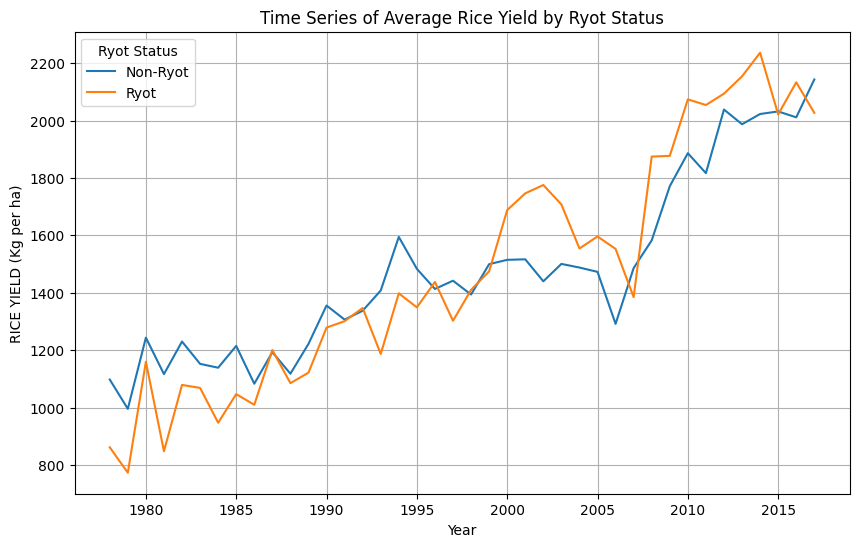

In [35]:
import matplotlib.pyplot as plt

average_rice_yield.unstack().plot(kind='line', figsize=(10, 6))
plt.title('Time Series of Average Rice Yield by Ryot Status')
plt.xlabel('Year')
plt.ylabel('RICE YIELD (Kg per ha)')
plt.legend(title='Ryot Status', labels=['Non-Ryot', 'Ryot'])
plt.grid(True)
plt.show()